In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [31]:
#加载数据集
iris = datasets.load_iris()

In [32]:
#数据集包含的所有字段
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [33]:
#各特征字段
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
#pandas加载数据
x = pd.DataFrame(iris.data, columns=iris.feature_names)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
#展示数据描述性的统计信息
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
#查看数据条目数，多少行多少列
x.shape

(150, 4)

In [37]:
#打印基本信息
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [38]:
#数据标签字段转化为DataFrame
y = pd.DataFrame(iris.target,columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [39]:
#数据拆分，分为训练集和测试集
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=12)

In [40]:
print("len(xtrain):",len(xtrain))
print("len(ytrain):",len(ytrain))
print("len(xtest):",len(xtest))
print("len(ytest):",len(ytest))

len(xtrain): 105
len(ytrain): 105
len(xtest): 45
len(ytest): 45


In [41]:
xtrain

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
10,5.4,3.7,1.5,0.2
46,5.1,3.8,1.6,0.2
36,5.5,3.5,1.3,0.2
124,6.7,3.3,5.7,2.1
7,5.0,3.4,1.5,0.2
...,...,...,...,...
76,6.8,2.8,4.8,1.4
3,4.6,3.1,1.5,0.2
130,7.4,2.8,6.1,1.9
134,6.1,2.6,5.6,1.4


In [42]:
#重设索引
for i in [xtrain,xtest,ytrain,ytest]:
    i.reset_index(drop=True,inplace=True)

In [43]:
xtrain

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.4,3.7,1.5,0.2
1,5.1,3.8,1.6,0.2
2,5.5,3.5,1.3,0.2
3,6.7,3.3,5.7,2.1
4,5.0,3.4,1.5,0.2
...,...,...,...,...
100,6.8,2.8,4.8,1.4
101,4.6,3.1,1.5,0.2
102,7.4,2.8,6.1,1.9
103,6.1,2.6,5.6,1.4


In [44]:
#创建模型并训练
tree_clf=DecisionTreeClassifier(criterion='entropy')
tree_clf=tree_clf.fit(xtrain,ytrain)

In [45]:
#训练集准确率
train_score = tree_clf.score(xtrain,ytrain)
train_score

1.0

In [46]:
#测试集准确率
test_score = tree_clf.score(xtest,ytest)
test_score

0.9777777777777777

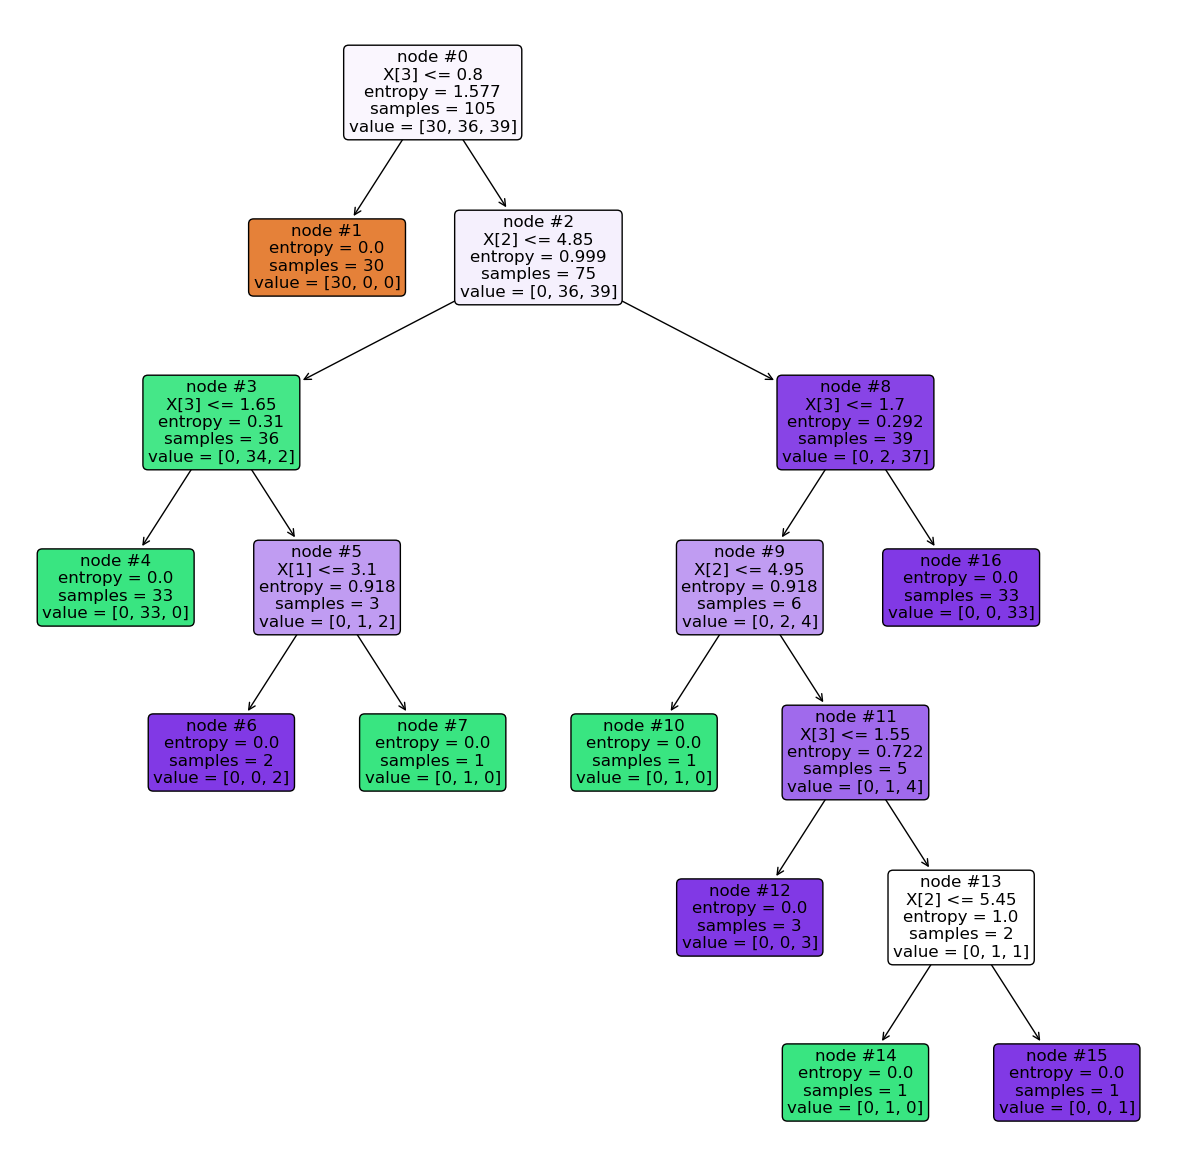

In [47]:
#对决策树进行美化并保存决策树照片到本地
plt.figure(figsize=(15,15))     #设置画布大小（单位为英寸）
tree.plot_tree(tree_clf,        #训练好的决策树评估器
               node_ids=True,   #显示节点id
               filled=True,     #给节点填充颜色
               rounded=True,    #节点方框变成圆角
               fontsize=12)     #节点中文本的字体大小

plt.savefig("iris数据集决策树.png") #保存图片需要在plt.show()之前
plt.show()

In [49]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [52]:
#将两个DataFrame按列合并
df_iris = pd.concat([x,y],axis=1)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

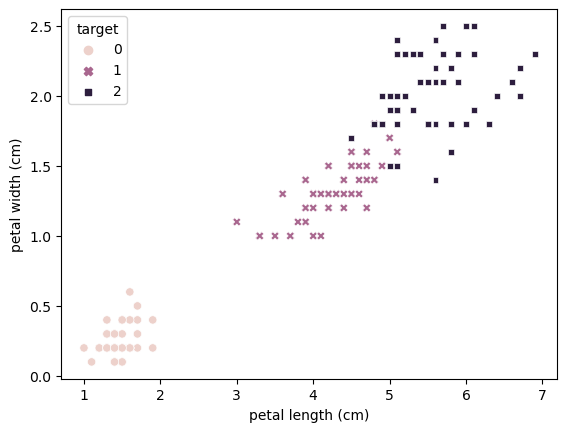

In [53]:
#seaborn库进行可视化
import seaborn as sns
#设置x轴为花瓣长度，y轴为花瓣宽度，按照不同的target赋予不同的点型和颜色
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='target',style='target',data=df_iris)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

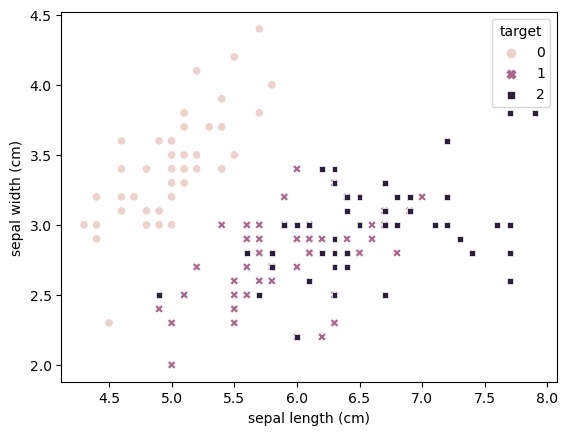

In [54]:
#设置x轴为花萼长度，y轴为花萼宽度，按照不同的target赋予不同的点型和颜色
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='target',style='target',data=df_iris)

In [56]:
tree_clf.tree_.compute_feature_importances(normalize=False)

array([0.        , 0.02623702, 0.53608642, 1.01425822])

In [57]:
tree_clf.feature_importances_

array([0.        , 0.01664172, 0.34003086, 0.64332742])

In [58]:
x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [59]:
#重要性
features_import = pd.DataFrame(x.columns,columns=['feature'])
features_import['importance'] = tree_clf.feature_importances_ #特征重要性
features_import.sort_values('importance',inplace = True)

0.0 sepal length (cm)
0.016641715681996218 sepal width (cm)
0.3400308612654517 petal length (cm)
0.6433274230525521 petal width (cm)


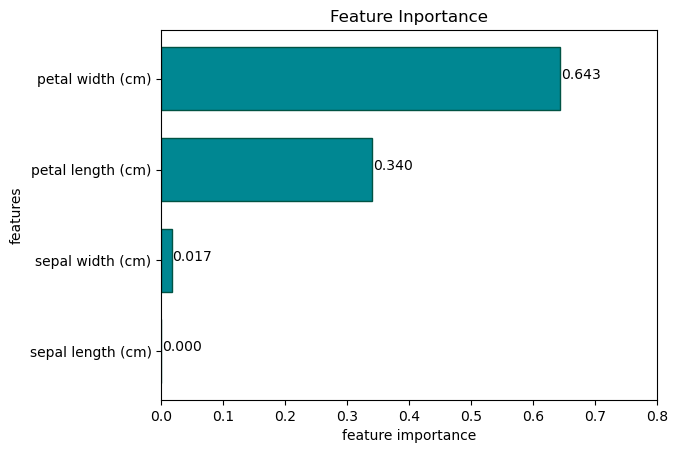

In [60]:
#绘画
plt.barh(features_import['feature'],
         features_import['importance'],
         height=0.7,
         color='#008792',
         edgecolor='#005344')
plt.xlabel('feature importance')
plt.ylabel('features')
plt.xlim(0.0,0.8)
plt.title('Feature Inportance')

for a,b in zip(features_import['importance'],features_import['feature']):
    print(a,b)
    plt.text(a+0.001,b,'%.3f'%float(a)) #a+0.001代表标签位置在柱形图上方0.001处
plt.show()